# 🌭Is Hotdog?🌭

Based on the TV series Silicon Valley, I will create a fully tutorialized Convolutional Neural Network (CNN) that can determine whether or not there is a hotdog in the image entered.  

#### 🔹 General Importations

we'll start with importing basic tools and functions for our task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils

import os, PIL
from glob import glob

import tensorflow as tf

print(tf.__version__)

2.7.0-dev20210922


#### 🔹 Deep Learning Functional Initializations

As good practice, let's initialize the specific tools we'll be using from TensorFlow to make things a little more readable moving forward.

In [2]:
""" Sequential Model Architecture """
Sequential = tf.keras.models.Sequential

""" Data Preprocessing Functions """
Resizing = tf.keras.layers.Resizing
Rescaling = tf.keras.layers.Rescaling

""" Data Augmentation Functions """
RandomFlip = tf.keras.layers.RandomFlip
RandomRotation = tf.keras.layers.RandomRotation
RandomZoom = tf.keras.layers.RandomZoom

""" Artificial Neural Network Layer Inventory """
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

""" Convolutional Neural Network Layer Inventory """
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPooling2D
Flatten = tf.keras.layers.Flatten

""" Residual Network Layer Inventory """
ResNet50 = tf.keras.applications.resnet50.ResNet50

""" Function to Load Images from Target Folder """
image_dataset_from_directory = tf.keras.preprocessing.image_dataset_from_directory

#### 🔹 Data Loading and Preprocessing

In [3]:
# Use the `glob.glob` function to show how many images are in each folder
DATA_DIRECTORY = "../dataset/"
HOT_DOG_IMAGES_PATTERN = f"{DATA_DIRECTORY}/hot_dog/*"
NOT_HOT_DOG_IMAGES_PATTERN = f"{DATA_DIRECTORY}/not_hot_dog/*"

print(f"Number of hotdog image samples: {len(glob(HOT_DOG_IMAGES_PATTERN))}")
print(f"Number of not-hotdog image samples: {len(glob(NOT_HOT_DOG_IMAGES_PATTERN))}")

Number of hotdog image samples: 499
Number of not-hotdog image samples: 499


In [4]:
batch_size = 32
IMAGE_HEIGHT = IMAGE_WIDTH = 256

In [5]:
# needed to remove error caused by tf-nightly & image_dataset_from_directory
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

train = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIRECTORY,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size
)

Found 998 files belonging to 2 classes.
Using 799 files for training.


In [6]:
class_names = train.class_names

In [7]:
validation = image_dataset_from_directory(
    directory=DATA_DIRECTORY,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size
)

Found 998 files belonging to 2 classes.
Using 199 files for validation.


#### 🔹 Pre-Optimize Image File Ingestion

This is an accessory step to optimize image data ingestion at the cost of slightly higher memory usage. No modifications are required for this function. 

In [8]:
def configure_performant_datasets(dataset, shuffling=None):
    """ 
    Custom function to prefetch and cache stored elements
    of retrieved image data to boost latency and performance
    at the cost of higher memory usage. 
    """
    AUTOTUNE = tf.data.AUTOTUNE
    # Cache and prefetch elements of input data for boosted performance
    if not shuffling:
        return dataset.cache().prefetch(buffer_size=AUTOTUNE)
    else:
        return dataset.cache().shuffle(shuffling).prefetch(buffer_size=AUTOTUNE)

In [9]:
train =         configure_performant_datasets(train, shuffling=1000)
validation =    configure_performant_datasets(validation)

#### 🔹 Data Ingestion and Predictive Modeling

In [10]:
resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

In [15]:
input_layer = tf.keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

random_flipping_layer = RandomFlip("horizontal", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
random_rotation_layer = RandomRotation(0.1)
random_zooming_layer = RandomZoom(0.2)

augmentation_layer = Sequential([random_flipping_layer, 
                                       random_rotation_layer, 
                                       random_zooming_layer])

rescaling_layer = Rescaling(scale=1/127.5, offset=-1)

first_convolutional_layer = Conv2D(16, 
                                   kernel_size=(3, 3), 
                                   activation="relu")
second_convolutional_layer = Conv2D(32,
                                    kernel_size=(3, 3),
                                    activation="relu")
third_convolutional_layer = Conv2D(64,
                                   kernel_size=(3, 3),
                                   activation="relu")
fourth_convolutional_layer = Conv2D(64,
                                    kernel_size=(3, 3),
                                    activation="relu")
fifth_convolutional_layer = Conv2D(64,
                                    kernel_size=(3, 3),
                                    activation="relu")

first_pooling_layer = MaxPool2D(pool_size=(2, 2))
second_pooling_layer = MaxPool2D(pool_size=(2, 2))
third_pooling_layer = MaxPool2D(pool_size=(2, 2))
fourth_pooling_layer = MaxPool2D(pool_size=(2, 2))
fifth_pooling_layer = MaxPool2D(pool_size=(2, 2))

flattening_layer = Flatten()

first_connective_layer = Dense(512, activation="relu")
output_connective_layer = Dense(1, activation='sigmoid')

first_dropout_layer = Dropout(0.3)

In [16]:
""" Sequential Model Architecture Setup """
model = Sequential()

""" CNN Layering Steps """
model.add(input_layer)
model.add(augmentation_layer)
model.add(rescaling_layer)
model.add(first_convolutional_layer)
model.add(first_pooling_layer)
model.add(second_convolutional_layer)
model.add(second_pooling_layer)
model.add(third_convolutional_layer)
model.add(third_pooling_layer)
model.add(fourth_convolutional_layer)
model.add(fourth_pooling_layer)
model.add(fifth_convolutional_layer)
model.add(fifth_pooling_layer)
model.add(flattening_layer)
model.add(first_connective_layer)
model.add(first_dropout_layer)
model.add(output_connective_layer)

""" CNN Architecture Summarization """
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)      0         
2D)                                                              
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)        0         
2D)                                                   

In [17]:
""" CNN Model Compilation """
# TODO: Compile Model with Appropriate Loss, Optimizer, and Metrics-Based Parameters
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer="nadam",
    metrics=["accuracy"]
)

In [18]:
""" CNN Model Fitness and History Extraction """
# TODO: Fit Model Against Training and Validation Data with Appropriate Epochs
epochs = 50
history = model.fit(train,
                    validation_data=validation,
                    epochs=epochs)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 20s 712ms/step - loss: 0.6912 - accuracy: 0.5307 - val_loss: 0.6810 - val_accuracy: 0.5779
Epoch 2/50
25/25 [==============================] - 18s 727ms/step - loss: 0.6984 - accuracy: 0.5507 - val_loss: 0.6862 - val_accuracy: 0.6030
Epoch 3/50
25/25 [==============================] - 18s 731ms/step - loss: 0.6866 - accuracy: 0.5895 - val_loss: 0.6848 - val_accuracy: 0.5025
Epoch 4/50
25/25 [==============================] - 18s 739ms/step - loss: 0.6659 - accuracy: 0.5932 - val_loss: 0.6690 - val_accuracy: 0.6131
Epoch 5/50
25/25 [==============================] - 18s 731ms/step - loss: 0.6610 - accuracy: 0.6145 - val_loss: 0.6857 - val_accuracy: 0.5126
Epoch 6/50
25/25 [==============================] - 18s 725ms/step - loss: 0.6505 - accuracy: 0.6208 - val_loss: 0.6354 - val_accuracy: 0.6834
Epoch 7/50
25/25 [==============================] - 18s 729ms/step - loss: 0.6344 - accuracy: 0.6508 - val_loss: 0.6459 - val_accuracy: 0.6432
Epoch 8/50

In [19]:
""" CNN Model Predictive Evaluation """
model.evaluate(validation)

7/7 [==============================] - 1s 180ms/step - loss: 1.3024 - accuracy: 0.7035


[1.3023579120635986, 0.7035176157951355]

In [20]:
def plot_training_results(history):
    """
    Visualize results of the model training using `matplotlib`.

    The visualization will include charts for accuracy and loss, 
    on the training and as well as validation data sets.

    INPUTS:
        history(tf.keras.callbacks.History): 
            Contains data on how the model metrics changed 
            over the course of training.
    
    OUTPUTS: 
        None.
    """
    accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


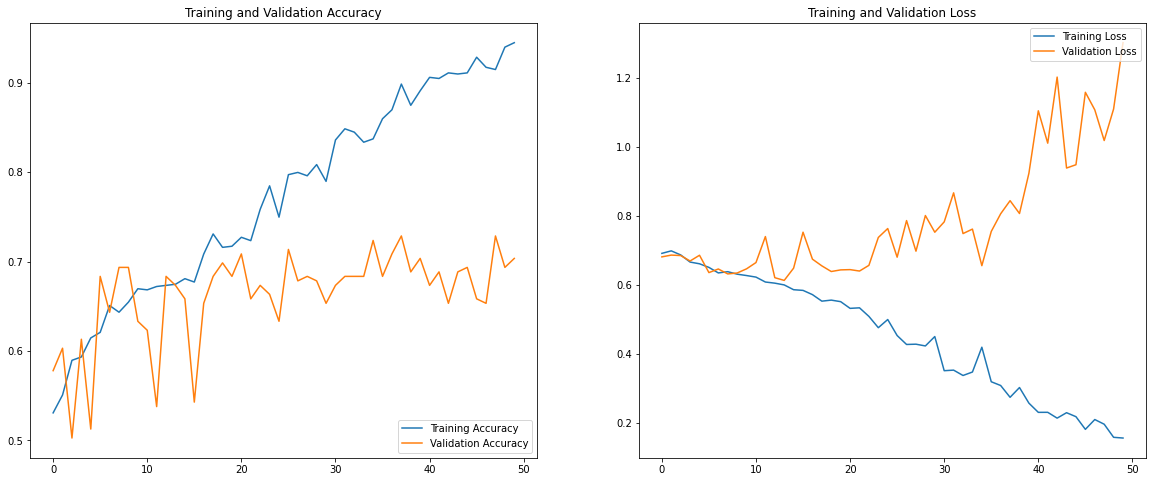

In [21]:
plot_training_results(history)